In [3]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [4]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras.backend as K
from tensorflow import keras
from keras.layers import Reshape, Conv2DTranspose, PReLU
from keras.utils import to_categorical, plot_model
from keras.layers import Concatenate
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.image import resize
from scipy.linalg import sqrtm
import tensorflow as tf
from IPython.display import clear_output, HTML
import glob
from keras.layers import AveragePooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Add
from keras.layers import Normalization, Dense, Conv2D, Dropout, BatchNormalization, ReLU
from keras.models import Sequential, Model
from keras import Input
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal
from keras.layers import LeakyReLU, GlobalMaxPooling2D, GlobalAveragePooling2D
import numpy as np
%pip install scikit-image
from skimage.transform import AffineTransform, warp
from keras import Sequential, Model
from keras.layers import Dense, Conv2D, Reshape, UpSampling2D, \
    BatchNormalization, Activation, Input, LeakyReLU, ZeroPadding2D, Dropout, Flatten, Conv2DTranspose
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import rotate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization, Activation, Input, LeakyReLU
from keras.initializers import RandomNormal
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
#import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import time
# import cv2
# from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout, Embedding, Concatenate

Note: you may need to restart the kernel to use updated packages.


In [5]:
# List physical GPUs and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('emnist-letters-train.csv', delimiter=',', header=None)

In [7]:
df = df[df[0] != -1]

In [8]:
# Define the mapping dictionary
mapping = {1: 0, 
           2: 1, 
           3: 2, 
           4: 3, 
           5: 4, 
           6: 5, 
           7: 6, 
           8: 7, 
           9: 8, 
           10: 9, 
           11: 10, 
           12: 11, 
           13: 12, 
           14: 13, 
           15: 14, 
           16: 15, 
           17: 16, 
           18: 17, 
           19: 18, 
           20: 19, 
           21: 20, 
           22: 21, 
           23: 22, 
           24: 23, 
           25: 24, 
           26: 25, 
           27: 26}

        # Map the labels column to its corresponding value
df[0] = df[0].map(mapping)

In [9]:
y_pre = np.array(df.iloc[:,0].values)
y_pre = pd.Categorical(y_pre)
X = np.array(df.iloc[:,1:].values)
X = X.reshape(-1,28,28,1)
preprocessed = []
for image in X:
    rotated_image = rotate(image, 90, reshape=False)
    flipped_image = np.flipud(rotated_image)
    preprocessed.append(flipped_image)
X_pre = np.array(preprocessed)
X = X_pre
X = X.astype('float32')
X_pre = (X - 127.5) / 127.5

In [10]:
print(f'y_pre\n{y_pre.unique()}')

y_pre
[22, 6, 15, 14, 16, ..., 19, 8, 5, 11, 0]
Length: 26
Categories (26, int64): [0, 1, 2, 3, ..., 22, 23, 24, 25]


# DCGAN BaseModel

In [27]:
class DCGAN():
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        optimizer = Adam(0.0002, 0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        model.add(Dense(256 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
        model.add(Reshape((7, 7, 256)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(128, (3,3), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # upsample to 28x28
        model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same", activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(512, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)


    def save_imgs(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('Improved DCGAN', exist_ok=True)
        fig.savefig("Improved DCGAN/DCGAN_{:d}.png".format(epoch))
        plt.close()
        
    def train(self, epochs, batch_size=1024, save_interval=1, gen_steps=1):
        # Load the dataset
        X_train = X_pre
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        batches_per_epoch = X_train.shape[0] // batch_size
        for epoch in range(epochs):
            for batch in range(batches_per_epoch):

                # ---------------------
                # Train Discriminator
                # ---------------------
                # Select a random half of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                # Sample noise and generate a batch of new images
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                gen_imgs = self.generator.predict(noise)
                # Train the discriminator (real classified as ones
                # and generated as zeros)
                self.discriminator.trainable = True
                d_loss_real = self.discriminator.train_on_batch(imgs, valid)
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
                # ---------------------
                # Train Generator
                # ---------------------
                # Train the generator (wants discriminator to mistake
                # images as real)
                # Sample noise and generate a batch of new images
                self.discriminator.trainable = False
                for _ in range(1):
                    noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                    g_loss = self.combined.train_on_batch(noise, valid)
                    
                # Plot the progress
                print ("Epoch: %d/%d  Batch Size: %d/%d [loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch,epochs,batch,batches_per_epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

In [28]:
dcgan4 = DCGAN(28,28,1)


dcgan4.train(epochs=200, batch_size=1024, save_interval=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 7, 7, 256)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 512)        

# CGAN

In [8]:
class CGAN():
    def __init__(self, rows, cols, channels, z=100, num_classes=26):
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        self.num_classes = num_classes
        optimizer = Adam(0.0002, 0.5)
        self.discriminator = self.define_discriminator(self.img_shape, self.num_classes)
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        self.generator = self.define_generator(self.latent_dim, self.num_classes)
        z = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([z, label])
        self.discriminator.trainable = False
        valid = self.discriminator([img, label])
        self.combined = Model([z, label], valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def define_discriminator(self, in_shape, n_classes):
        in_label = Input(shape=(1,))
        li = Embedding(n_classes, 50)(in_label)
        n_nodes = in_shape[0] * in_shape[1]
        li = Dense(n_nodes)(li)
        li = Reshape((in_shape[0], in_shape[1], 1))(li)
        in_image = Input(shape=in_shape)
        merge = Concatenate()([in_image, li])
        fe = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(merge)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Flatten()(fe)
        fe = Dropout(0.4)(fe)
        out_layer = Dense(1, activation='sigmoid')(fe)
        model = Model([in_image, in_label], out_layer)
        return model

    def define_generator(self, latent_dim, n_classes):
        in_label = Input(shape=(1,))
        li = Embedding(n_classes, 50)(in_label)
        n_nodes = 7 * 7
        li = Dense(n_nodes)(li)
        li = Reshape((7, 7, 1))(li)
        in_lat = Input(shape=(latent_dim,))
        n_nodes = 128 * 7 * 7
        gen = Dense(n_nodes)(in_lat)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Reshape((7, 7, 128))(gen) 
        merge = Concatenate()([gen, li])
        gen = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same')(merge)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same')(gen)
        gen = LeakyReLU(alpha=0.2)(gen)
        out_layer = Conv2D(1, (7, 7), activation='tanh', padding='same')(gen)
        model = Model([in_lat, in_label], out_layer)
        return model

    def save_imgs(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        sampled_labels = np.arange(0, r * c).reshape(-1, 1) % self.num_classes  # Ensure labels are within valid range
        gen_imgs = self.generator.predict([noise, sampled_labels])
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        plt.suptitle(f"CGAN (Epoch {epoch})", fontsize=16)
        os.makedirs('CGAN_mnist', exist_ok=True)
        fig.savefig("CGAN_mnist/CGAN_mnist_%d.png" % epoch)
        plt.close()


    def train(self, epochs=200, batch_size=1024, save_interval=1, gen_steps=3):
        X_train = X_pre
        y_train = y_pre

        batches_per_epoch = X_train.shape[0] // batch_size

        for epoch in range(epochs):
            for batch in range(batches_per_epoch):
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                labels_real = np.ones((batch_size, 1))  # Real labels

                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                gen_labels = np.random.randint(0, self.num_classes, (batch_size, 1))  # Ensure valid range
                gen_imgs = self.generator.predict([noise, gen_labels])
                labels_fake = np.zeros((batch_size, 1))  # Fake labels

                d_loss_real = self.discriminator.train_on_batch([imgs, y_train[idx]], labels_real)
                d_loss_fake = self.discriminator.train_on_batch([gen_imgs, gen_labels], labels_fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

                g_loss = None
                for _ in range(gen_steps):
                    noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                    gen_labels = np.random.randint(0, self.num_classes, (batch_size, 1))  # Ensure valid range
                    valid_y = np.ones((batch_size, 1))
                    g_loss = self.combined.train_on_batch([noise, gen_labels], valid_y)

                # Print the progress
                print(f"Epoch {epoch + 1}/{epochs}, Batch {batch + 1}/{batches_per_epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss}]")

            if (epoch) % save_interval == 0:
                self.save_imgs(epoch + 1)


In [9]:
# # Set image dimensions
# img_rows, img_cols, channels = 28, 28, 1

# # Instantiate and train the DCGAN
# cgan = CGAN(img_rows, img_cols, channels)
# cgan.train()

# ACGAN

In [22]:
class ACGAN:
    def __init__(self, rows, cols, channels, z=100, num_classes=26):
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        self.num_classes = num_classes
        optimizer = Adam(0.00002, 0.5)
        self.discriminator = self.define_discriminator(self.img_shape, self.num_classes)
        self.generator = self.define_generator(self.latent_dim, self.num_classes)
        z = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([z, label])
        self.discriminator.trainable = False
        valid = self.discriminator([img, label])
        self.combined = self.define_gan(self.generator,self.discriminator)

        
    def define_discriminator(self, in_shape, n_classes):
        init = RandomNormal(stddev=0.02)
        in_image = Input(shape=in_shape)
        fe = Conv2D(32, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Dropout(0.5)(fe)
        fe = Conv2D(64, (3,3), padding='same', kernel_initializer=init)(fe)
        fe = BatchNormalization()(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Dropout(0.5)(fe)
        fe = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(fe)
        fe = BatchNormalization()(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Dropout(0.5)(fe)
        fe = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(fe)
        fe = BatchNormalization()(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Dropout(0.5)(fe)
        fe = Flatten()(fe)
        out1 = Dense(1, activation='sigmoid')(fe)
        out2 = Dense(n_classes, activation='softmax')(fe)
        model = Model(in_image, [out1, out2])
        opt = Adam(lr=0.00002, beta_1=0.5)
        model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
        return model

    def define_generator(self, latent_dim, n_classes):
        init = RandomNormal(stddev=0.02)
        in_label = Input(shape=(1,))
        li = Embedding(n_classes, 50)(in_label)
        n_nodes = 7 * 7
        li = Dense(n_nodes, kernel_initializer=init)(li)
        li = Reshape((7, 7, 1))(li)
        in_lat = Input(shape=(latent_dim,))
        n_nodes = 512 * 7 * 7
        gen = Dense(n_nodes, kernel_initializer=init)(in_lat)
        gen = Activation('relu')(gen)
        gen = Reshape((7, 7, 512))(gen)
        merge = Concatenate()([gen, li])
        gen = Conv2DTranspose(192, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(merge)
        gen = BatchNormalization()(gen)
        gen = Activation('relu')(gen)
        gen = Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(gen)
        out_layer = Activation('tanh')(gen)
        model = Model([in_lat, in_label], out_layer)
        return model
    
        # define the combined generator and discriminator model, for updating the generator
    def define_gan(self, g_model, d_model):
        # make weights in the discriminator not trainable
        for layer in d_model.layers:
            if not isinstance(layer, BatchNormalization):
                layer.trainable = False
        # connect the outputs of the generator to the inputs of the discriminator
        gan_output = d_model(g_model.output)
        # define gan model as taking noise and label and outputting real/fake and label outputs
        model = Model(g_model.input, gan_output)
        # compile model
        opt = Adam(lr=0.0002, beta_1=0.5)
        model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
        return model



    def save_imgs(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        sampled_labels = np.arange(0, r * c).reshape(-1, 1) % self.num_classes
        gen_imgs = self.generator.predict([noise, sampled_labels])
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                # axs[i, j].set_title(chr(sampled_labels[cnt][0] + 65))
                axs[i, j].axis('off')
                cnt += 1
        plt.suptitle(f"ACGAN (Epoch {epoch})", fontsize=16)
        os.makedirs('ACGAN_mnist_2', exist_ok=True)
        fig.savefig("ACGAN_mnist_2/ACGAN_mnist_%d.png" % epoch)
        plt.close()


    def generate_latent_points(self, latent_dim, n_samples, n_classes=26):
        # generate points in the latent space
        x_input = randn(latent_dim * n_samples)
        # reshape into a batch of inputs for the network
        z_input = x_input.reshape(n_samples, latent_dim)
        # generate labels
        labels = randint(0, n_classes, n_samples)
        return [z_input, labels]


    def train(self, epochs=200, batch_size=2056, save_interval=1, gen_steps=1):
        X_train = X_pre
        y_train = y_pre

        batches_per_epoch = X_train.shape[0] // batch_size

        for epoch in range(epochs):
            for batch in range(batches_per_epoch):
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                labels_real = np.ones((batch_size, 1))

                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                gen_labels = np.random.randint(0, self.num_classes, (batch_size, 1))
                gen_imgs = self.generator.predict([noise, gen_labels])
                labels_fake = np.zeros((batch_size, 1))

                d_loss_real = self.discriminator.train_on_batch(imgs, [labels_real, y_train[idx]])
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, [labels_fake, gen_labels])
                d_loss_1 = 0.5 * np.add(d_loss_real[0], d_loss_fake[0])
                d_loss_2 = 0.5 * np.add(d_loss_real[1], d_loss_fake[1])

                for _ in range(gen_steps):
                    z_input, z_labels = self.generate_latent_points(self.latent_dim, batch_size)
                    y_gan = np.ones((batch_size, 1))
                    g_loss = self.combined.train_on_batch([z_input, z_labels], [y_gan, z_labels])

                print(f"Epoch {epoch + 1}/{epochs}, Batch {batch + 1}/{batches_per_epoch} [D loss 1: {d_loss_1}, D loss 2: {d_loss_2}, G loss: {g_loss}]")

            if epoch % save_interval == 0:
                self.save_imgs(epoch + 1)

In [23]:
# Set image dimensions
img_rows, img_cols, channels = 28, 28, 1

# Instantiate and train the DCGAN
acgan = ACGAN(img_rows, img_cols, channels)
acgan.train()

65/65 [==============================] - 0s 3ms/step
Epoch 1/200, Batch 1/43 [D loss 1: 5.07591700553894, D loss 2: 0.8845160901546478, G loss: [3.950083017349243, 0.6920515894889832, 3.2580313682556152]]
65/65 [==============================] - 0s 3ms/step
Epoch 1/200, Batch 2/43 [D loss 1: 5.070025205612183, D loss 2: 0.9115675687789917, G loss: [3.9487624168395996, 0.6902897357940674, 3.2584726810455322]]
65/65 [==============================] - 0s 3ms/step
Epoch 1/200, Batch 3/43 [D loss 1: 5.0332841873168945, D loss 2: 0.8931187093257904, G loss: [3.9468448162078857, 0.6886608600616455, 3.2581839561462402]]
65/65 [==============================] - 0s 3ms/step
Epoch 1/200, Batch 4/43 [D loss 1: 4.989941120147705, D loss 2: 0.8722847700119019, G loss: [3.9449925422668457, 0.6870461702346802, 3.257946491241455]]
65/65 [==============================] - 0s 3ms/step
Epoch 1/200, Batch 5/43 [D loss 1: 4.971191883087158, D loss 2: 0.8598926067352295, G loss: [3.944643497467041, 0.6860059

KeyboardInterrupt: 

# Improved DCGAN

In [ ]:
class DCGAN():
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        optimizer = Adam(0.0002, 0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        model.add(Dense(256 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
        model.add(Reshape((7, 7, 256)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # upsample to 28x28
        model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same", activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(512, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)


    def save_imgs(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('Improved DCGAN 2', exist_ok=True)
        fig.savefig("Improved DCGAN 2/DCGAN_{:d}.png".format(epoch))
        plt.close()
        
    def train(self, epochs, batch_size=1024, save_interval=1, gen_steps=1):
        # Load the dataset
        X_train = X_pre
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        batches_per_epoch = X_train.shape[0] // batch_size
        for epoch in range(epochs):
            for batch in range(batches_per_epoch):

                # ---------------------
                # Train Discriminator
                # ---------------------
                # Select a random half of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                # Sample noise and generate a batch of new images
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                gen_imgs = self.generator.predict(noise)
                # Train the discriminator (real classified as ones
                # and generated as zeros)
                self.discriminator.trainable = True
                d_loss_real = self.discriminator.train_on_batch(imgs, valid)
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
                # ---------------------
                # Train Generator
                # ---------------------
                # Train the generator (wants discriminator to mistake
                # images as real)
                # Sample noise and generate a batch of new images
                self.discriminator.trainable = False
                for _ in range(1):
                    noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                    g_loss = self.combined.train_on_batch(noise, valid)
                    
                # Plot the progress
                print ("Epoch: %d/%d  Batch Size: %d/%d [loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch,epochs,batch,batches_per_epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

In [ ]:
dcgan_Model_improvement = DCGAN(28,28,1)
dcgan_Model_improvement.train(epochs=200, batch_size=1024, save_interval=1)

# Model Improvement
- Data Augmentation
- DCGAN
    - Batch Normalised DCGAN
- ACGAN

## Batch Normalization


DGCAN strongly recommends adding BM into the network design. The use of BM also become a general practice in many deep network model. However, there will be exceptions. The following figure demonstrates the impact of BN on different dataset. The y-axis is the FID score which the lower the better. As suggested by the WGAN-GP paper, BN should be off when it is used. We suggest readers to check the cost function used and the corresponding FID performance on BN, and verify the setting with experiments.

https://towardsdatascience.com/gan-ways-to-improve-gan-performance-acf37f9f59b

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*Ttfns14b8Cfxg3NcmVzsow.jpeg'>

In [13]:
class DCGAN():
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        optimizer = Adam(0.0002, 0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        model.add(Dense(256 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
        model.add(Reshape((7, 7, 256)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # upsample to 28x28
        model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same", activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        
        # First Conv2D layer with BatchNormalization
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(512, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        
        return Model(img, validity)

    def save_imgs(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('Improved DCGAN BM', exist_ok=True)
        fig.savefig("Improved DCGAN BM/DCGAN_{:d}.png".format(epoch))
        plt.close()
        
    def train(self, epochs, batch_size=1024, save_interval=1, gen_steps=1):
        # Load the dataset
        X_train = X_pre
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        batches_per_epoch = X_train.shape[0] // batch_size
        for epoch in range(epochs):
            for batch in range(batches_per_epoch):

                # ---------------------
                # Train Discriminator
                # ---------------------
                # Select a random half of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                # Sample noise and generate a batch of new images
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                gen_imgs = self.generator.predict(noise)
                # Train the discriminator (real classified as ones
                # and generated as zeros)
                self.discriminator.trainable = True
                d_loss_real = self.discriminator.train_on_batch(imgs, valid)
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
                # ---------------------
                # Train Generator
                # ---------------------
                # Train the generator (wants discriminator to mistake
                # images as real)
                # Sample noise and generate a batch of new images
                self.discriminator.trainable = False
                for _ in range(1):
                    noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                    g_loss = self.combined.train_on_batch(noise, valid)
                    
                # Plot the progress
                print ("Epoch: %d/%d  Batch Size: %d/%d [loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch,epochs,batch,batches_per_epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

In [14]:
dcgan_Batch_Normalization = DCGAN(28,28,1)
dcgan_Batch_Normalization.train(epochs=200, batch_size=1024, save_interval=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       1280      
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 128)      512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                      

## Running Generator More every Batch Per Epoch

In [25]:
class DCGAN():
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        optimizer = Adam(0.0002, 0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        model.add(Dense(256 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
        model.add(Reshape((7, 7, 256)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # upsample to 28x28
        model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same", activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(512, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(1024, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)


    def save_imgs(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('Improved DCGAN 2 GEN 1 DIS', exist_ok=True)
        fig.savefig("Improved DCGAN 2 GEN 1 DIS/DCGAN_{:d}.png".format(epoch))
        plt.close()
        
    def train(self, epochs, batch_size=1024, save_interval=1):
        # Load the dataset
        X_train = X_pre
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        batches_per_epoch = X_train.shape[0] // batch_size
        for epoch in range(epochs):
            for batch in range(batches_per_epoch):

                # ---------------------
                # Train Discriminator
                # ---------------------
                # Select a random half of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                # Sample noise and generate a batch of new images
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                gen_imgs = self.generator.predict(noise)
                # Train the discriminator (real classified as ones
                # and generated as zeros)
                self.discriminator.trainable = True
                d_loss_real = self.discriminator.train_on_batch(imgs, valid)
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
                # ---------------------
                # Train Generator
                # ---------------------
                # Train the generator (wants discriminator to mistake
                # images as real)
                # Sample noise and generate a batch of new images
                self.discriminator.trainable = False
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                g_loss = self.combined.train_on_batch(noise, valid)
                    
                # Plot the progress
                print ("Epoch: %d/%d  Batch Size: %d/%d [loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch,epochs,batch,batches_per_epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

In [26]:
dcgan_Batch_Double_Gen = DCGAN(28,28,1)
dcgan_Batch_Double_Gen.train(epochs=200, batch_size=1024, save_interval=1)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 14, 14, 128)       1280      
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 dropout_22 (Dropout)        (None, 14, 14, 128)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 7, 7, 256)         0         
                                                                 
 dropout_23 (Dropout)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 512)       

# Kernel Size, Strides & Padding
<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*xwSNlXKR8P3dRS9g1xM__Q.png'>
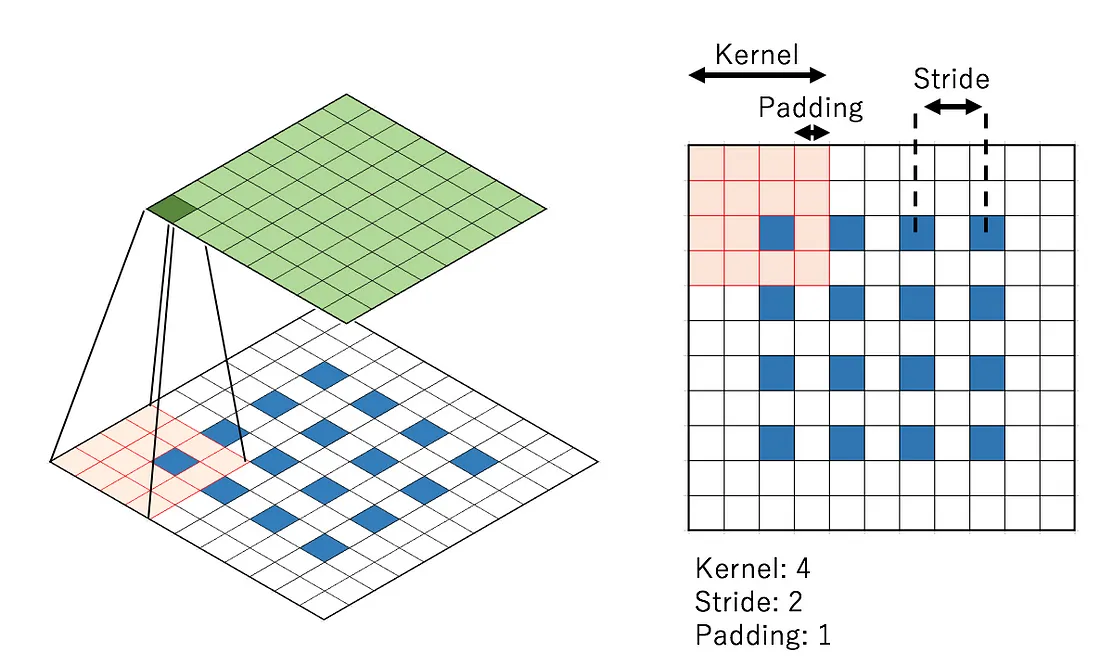

# Leaky ReLU over ReLU
### Unlike ReLU, LeakyReLU allows a certain amount to slide out. This enables the neurons to remain active. If ReLU was used, it would have caused the output of neurons to be zero leading to ‘dead neurons

#### Training This is where GANs get interesting. The GAN starts min-max games of the Generator and the Discriminator. At first, we send noise to the Generator to generate an image. Real Images are sent to Discriminator and loss is found for that case. Similarly, we do it for fake images. Finally, we find the overall discriminator loss by taking the mean out.



In [25]:
class DCGAN():
    def __init__(self, rows, cols, channels, z=100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        optimizer = Adam(0.002, 0.5, 0.99)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        model.add(Dense(512 * 7 * 7, activation="relu", input_dim=self.latent_dim))  # connect the input to dense layer
        model.add(Reshape((7, 7, 512)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # upsample to 28x28
        model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same", activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(512, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(1024, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)

    def save_imgs(self, epoch):
        r, c = 10, 10
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        fig.suptitle(f'Epoch : {epoch} G:512,256,128 | D:128,256,512,1024 |\n| lr:0.002 ', fontsize=16)
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        os.makedirs('Improved DCGAN BIGGER', exist_ok=True)
        fig.savefig("Improved DCGAN BIGGER/DCGAN_{:d}.png".format(epoch))
        plt.close()

    def train(self, epochs, batch_size=1024, save_interval=1):
        # Load the dataset
        X_train = X_pre
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        batches_per_epoch = X_train.shape[0] // batch_size
        for epoch in range(epochs):
            for batch in range(batches_per_epoch):

                # ---------------------
                # Train Discriminator
                # ---------------------
                # Select a random half of images
                for _ in range(2):
                    idx = np.random.randint(0, X_train.shape[0], batch_size)
                    imgs = X_train[idx]
                    # Sample noise and generate a batch of new images
                    noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                    gen_imgs = self.generator.predict(noise)
                    # Train the discriminator (real classified as ones
                    # and generated as zeros)
                    self.discriminator.trainable = True
                    d_loss_real = self.discriminator.train_on_batch(imgs, valid)
                    d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
                    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

                    # ---------------------
                    # Train Generator
                    # ---------------------
                    self.discriminator.trainable = False
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                g_loss = self.combined.train_on_batch(noise, valid)

                # Plot the progress
                print("Epoch: %d/%d  Batch Size: %d/%d [loss: %f, acc.: %.2f%%] [G loss: %f]" % (
                epoch, epochs, batch, batches_per_epoch, d_loss[0], 100 * d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)


In [26]:
dcgan_Batch_Relu = DCGAN(28,28,1)
dcgan_Batch_Relu.train(epochs=200, batch_size=1024, save_interval=1)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 14, 14, 128)       1280      
                                                                 
 batch_normalization_25 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 dropout_24 (Dropout)        (None, 14, 14, 128)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 batch_normalization_26 (Bat  (None, 7, 7, 256)        1024      
 chNormalization)                                    

KeyboardInterrupt: 